In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/customer.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

# Tentukan jumlah Klaster

In [5]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

  0%|          | 0/8 [00:00<?, ?it/s]

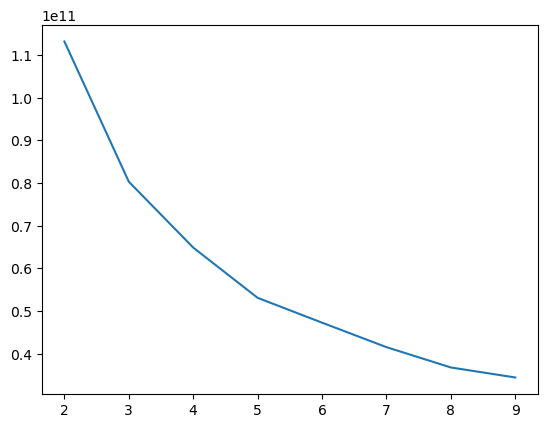

In [7]:
score = []
for k in tqdm(range(2,10)):
    model = KPrototypes(n_clusters=k)
    model.fit(df, categorical=[0,1])
    score.append(model.cost_)
plt.plot(range(2,10), score)

# Training

In [8]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0,1])

In [9]:
df_pred = df.copy()
df_pred["cluster"] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


# Analysis Cluster

In [17]:
centroids = model.cluster_centroids_
centroids

array([[8.29879758e+03, 3.81719335e+03, 5.26956798e+03, 2.56785498e+03,
        1.76899698e+03, 1.13603927e+03, 1.00000000e+00, 3.00000000e+00],
       [8.00004000e+03, 1.85114200e+04, 2.75739000e+04, 1.99668000e+03,
        1.24073600e+04, 2.25202000e+03, 2.00000000e+00, 3.00000000e+00],
       [3.61563898e+04, 6.12364407e+03, 6.36677966e+03, 6.81111864e+03,
        1.05001695e+03, 3.09005085e+03, 1.00000000e+00, 3.00000000e+00]])

In [13]:
df_cat= df[["Channel", "Region"]]
df_num= df.drop(columns=["Channel", "Region"])


In [21]:
df_cent = df_num.join(df_cat)

In [19]:
df_num.shape

(440, 6)

In [20]:
centroids.shape

(3, 8)

In [22]:
centroids = pd.DataFrame(centroids, columns=df_cent.columns)

In [23]:
centroids.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
0,8298.797583,3817.193353,5269.567976,2567.854985,1768.996979,1136.039275,1.0,3.0
1,8000.040000,18511.420000,27573.900000,1996.680000,12407.360000,2252.020000,2.0,3.0
2,36156.389831,6123.644068,6366.779661,6811.118644,1050.016949,3090.050847,1.0,3.0


cluster 0: customer murah <br>
cluster 1: typical suka belanja milk, grocery, deterjen<br>
cluster 2: customer yang suka fresh food<br>

In [24]:
centroids.mean()

Fresh               17485.075805
Milk                 9484.085807
Grocery             13070.082546
Frozen               3791.884543
Detergents_Paper     5075.457976
Delicassen           2159.370041
Channel                 1.333333
Region                  3.000000
dtype: float64